<a href="https://colab.research.google.com/github/HumanAndMachineHearing/Practical_2023/blob/main/Assignment_1_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Assignment 1. Exploring soundwaves and the ESC-50 dataset**

# 1. Introduction

In this session, you will explore properties of soundwaves, calculate and visualize spectral and temporal properties of sounds, and compare the properties of sounds from various categories in the ESC-50 dataset. All required information to complete this assignment is included in this notebook and the code can be implemented within this notebook.


For more information about audio feature extraction with Torchaudio, look at: https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html

**Practical Report**
<br>
For this session, you are expected to add the output of and answers to the exercises as defined in the notebook to the Practical Report. Also have a look at the [template](https://https://www.overleaf.com/project/652bde1cbefff3c9719c7df8) of the Practical Report.   


#Preparation

Before embarking on the exercises, import the libraries that are essential for this excerise.

In [1]:
# Machine learning framework
import torch

# Library for audio and signal processing with PyTorch
import torchaudio
import torchaudio.transforms as T # for common audio processings and feature extractions

# For manipulating directory paths
import os

# For working with datasets
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt
# To embed plots within the notebook
%matplotlib inline

# Scientific and vector computation for Python
import numpy as np

# API for display tools in Python
from IPython.display import Audio, display # display for playing audio

# 2. The ESC-50 database

The dataset that we use for these Practical Assignments is the Environmental Sound Classification 50 (ESC-50) dataset [1]. This dataset consists of sound clips of 5 second duration in 50 semantical classes, which can be organized in five overarching sound categories: 'Natural sound scapes & Water sounds', 'Human, non-speech sounds', 'Interior/Domestic sounds', 'Exterior/Urban noises'. More information about the dataset can be found [here](https://https://github.com/karolpiczak/ESC-50).  

The dataset can be found on Brightspace. Add the dataset to your Google Drive.




# 3. Exploring sound clips

To explore the properties of sounds from different categories, you will select and analyze some examples within each category. Below are some pre-defined examples but you are encouraged to have a look at the metadata file, listen to some sound clips and select your own examples.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file path to folder with .wav files
filepath_snds = '/content/drive/MyDrive/soundclass_resnet18/audio'


In [3]:
# Define a list of example files
snds = ['1-9886-A-49.wav', # saw
        '1-11687-A-47.wav', # airplane
        '1-13572-A-46.wav', # church bell
        '1-22694-A-20.wav', # baby crying
        '1-43382-A-1.wav'] # rooster

# Define an index for one of the examples in the list 'snds'
snd_idx = 4;

##Listening to sound clips
As a first step, listen to the sound clips. Select different sound clips by changing the index 'snd_idx' and/or the list of example sound clips 'snds'.




In [ ]:
# Load sound using torchaudio
waveform, sample_rate = torchaudio.load(os.path.join(filepath_snds,snds[snd_idx])) # returns a Tensor 'waveform'

# Play sound
Audio(waveform.numpy(),rate = sample_rate) # note that the tensor 'waveform' has to be converted to a numpy array

##Plotting soundwaves

You start by exploring the time representation of sounds.

**Exercise 1.1:**
<br>
Create plots of the soundwaves in the time domain. Select different sound clips by changing the index 'snd_idx' and/or the list of example sound clips 'snds'. Add the plots to your Practical Report.



Text(0, 0.5, 'Amplitude (a.u.)')

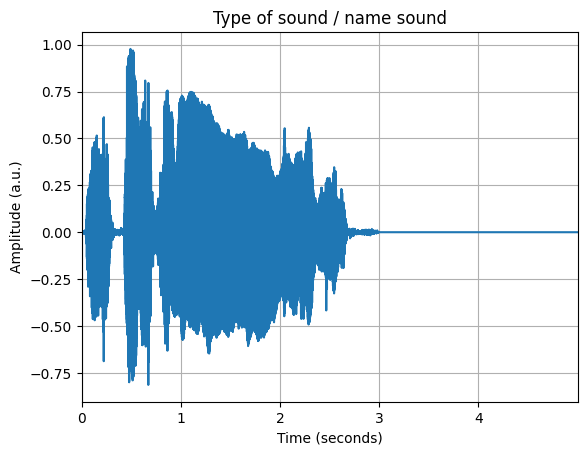

In [6]:
# Define time-axis
time_axis = torch.arange(0,waveform.shape[1])/sample_rate # define array of time in seconds

# Plot waveform
fig = plt.figure()
plt.plot(time_axis,waveform[0]) # plot waveform
plt.grid(True) # turn on grid
plt.xlim([time_axis[0], time_axis[len(time_axis)-1]]) # constrain x-axis to time axis
plt.title('Type of sound / name sound') # add a title
plt.xlabel('Time (seconds)') # add axis labels
plt.ylabel('Amplitude (a.u.)')

# 4. Frequency spectrum
You will now explore the frequency content of sounds. As you have learnt during the lecture, information about the spectral properties of a sound clip can be derived by calculating a Fourier Transform of a (portion of) the sound clip.

Select a part of the sound clip(s) that you would like to analyze by using a Hanning window or another suitable window function.

**Exercise 1.2:**
<br>
(A) Create a plot of the window function that you selected and include this in your report. Describe what artifacts in the spectrum are avoided by using this window function.
<br>
(B) Multiply the window function with different parts of a sound wave and/or different sound waves and include the plots in your report. Use the plots to describe what the effect of the window function is on a signal.

##Hanning window


In [7]:
# Define duration corresponding to 250 milliseconds
hann_n_samples = sample_rate/4 # duration of the window defined as a function of sampling rate
hann_time_axis = torch.arange(0,hann_n_samples)/sample_rate # time axis for plotting

# Construct a window function, e.g. a Hanning window
hann_win = np.hanning(hann_n_samples)

In [ ]:
# Add code here

##Fourier transform
Extract the magnitude spectrum of the selected parts of one or more sound clips.

**Exercise 1.3:**
<br>
Plot the frequency spectra of different sections of a single sound and/or of different sound clips. Describe what information the frequency spectra convey and compare the spectral content between the frequency spectrum of different (sections of) sound clips. Use terms such as 'fundamental frequency' and 'harmonics'.


In [ ]:
# Convert torch tensor to numpy array
waveform_np = waveform.numpy()

# Calculate Fourier transform
snd_fft = np.abs(np.fft.fft(waveform_np)) # compute FFT and take absolute
freq_fft = np.fft.fftfreq(waveform_np.shape[-1]) # extract frequency bins of FFT

# Define frequency axis
len_spec = int(np.shape(snd_fft)[1]/2) # define half of the double sided spectrum
snd_fft = np.abs(np.squeeze(snd_fft.real)[:len_spec-1])# take only real part and discard half of the spectrum
freq_fft = freq_fft[:len_spec-1] # frequency vector
freqs = np.abs(freq_fft*sample_rate) # convert frequency vector

# Plot spectrum
fig = plt.figure()
plt.plot(freqs,snd_fft)
plt.xlim([freqs[0], freqs[len(freqs)-1]]) # constrain x-axis to time axis
plt.title('Frequency spectrum') # add a title
plt.xlabel('Frequency (Hz)') # add axis labels
plt.ylabel('Amplitude');


# 5. Spectrogram
As a next step, you will create time-frequency representations of the sound clips by using the Short-Time Fourier Transform (STFT) to calculate spectrograms.  

**Exercise 1.4:**
<br> Implement the STFT for three or more sound clips. Explore how the spectrogram parameters (n_fft, window_length, hop_length) affect the temporal and spectral resolution of the resulting spectrograms. Answer the following questions and illustrate your report with figures.
<br>
(A) What happens when you increase/decrease the number of frequency bins?
<br>
(B) What happens when you increase/decrease the window size?
<br>
(C) What happens when you increase/decrease the hop length?


## Power spectrogram

In [ ]:
 # Specify parameters
sgram_n_fft = 1024 # size of FFT, creates n_fft/2 + 1 frequency bins; i.e. n_fft determines the resolution of the frequency axis
sgram_win_length = 512 # window size; default = n_fft; determines the resolution of the time axis
sgram_hop_length = 256 # length of hop between STFT windows; default = win_legth / 2; # determines the resolution of the time axis

# Define spectrogram transform
spectrogram = T.Spectrogram(
    n_fft = sgram_n_fft,
    win_length = sgram_win_length,
    hop_length = sgram_hop_length,
    center = True,
    pad_mode = "reflect",
    power = 2, # 1 for magnitude spectrogram; 2 for power spectrogram
)

# Calculate power spectrogram
spectrogram_snd = spectrogram(waveform)
# calculate frequency axis
spectrogram_freqs = np.arange(0,np.shape(spectrogram_snd)[1])*sample_rate/sgram_n_fft
# define time axis
spectrogram_time_axis = np.round(np.arange(0,np.shape(spectrogram_snd)[2])*((np.shape(waveform)[1]/np.shape(spectrogram_snd)[2])/sample_rate),2)

# Plot magnitude or power spectrogram
fig = plt.figure(figsize=(10,6))
plt.title('Name of sound')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.imshow(np.squeeze(spectrogram_snd), origin = 'lower', cmap = 'jet', vmin = 0, vmax = 100)
plt.colorbar(shrink = 0.8, label = 'Power') # add colorbar of same size as original plot
plt.yticks([0, 100, 200, 300, 400, 500],
            [int(spectrogram_freqs[0]),
             int(spectrogram_freqs[100]),
             int(spectrogram_freqs[200]),
             int(spectrogram_freqs[300]),
             int(spectrogram_freqs[400]),
             int(spectrogram_freqs[500])]);
plt.xticks([0,100,200,300,400,500,600,700,800, 861],
            [spectrogram_time_axis[0],
             spectrogram_time_axis[100],
             spectrogram_time_axis[200],
             spectrogram_time_axis[300],
             spectrogram_time_axis[400],
             spectrogram_time_axis[500],
             spectrogram_time_axis[600],
             spectrogram_time_axis[700],
             spectrogram_time_axis[800],
             spectrogram_time_axis[861]]);


## Power spectrogram in decibel unit

To conclude, you will change the unit of the power spectrogram to decibel (dB). Note that the reference value to convert power to decibel is 0 dB (i.e. the reference value used is 1, which gives log10(1) = 0).

**Exercise 1.5:**
<br>
Plot several spectrograms in decibel units and compare to the power spectrograms that you generated before. Describe differences and illustrate with plots.

In [ ]:
# Convert power spectrogram to decibel
offset_val = 1e-10 # add small offset to avoid taking logarithm of zero
spectrogram_snd_db = 10 * np.log10(spectrogram_snd+offset_val) # calculate dB from power

# Plot spectrogram in decibel
fig = plt.figure(figsize=(10,6))
plt.title('Spectrogram (decibel) ' + snds[snd_idx])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.imshow(np.squeeze(spectrogram_snd_db), origin = 'lower', cmap = 'jet', vmin = -20, vmax = 20)
plt.colorbar(shrink = 0.8, label = 'Decibel') # add colorbar of same size as original plot
plt.yticks([0, 100, 200, 300, 400, 500],
            [int(spectrogram_freqs[0]),
             int(spectrogram_freqs[100]),
             int(spectrogram_freqs[200]),
             int(spectrogram_freqs[300]),
             int(spectrogram_freqs[400]),
             int(spectrogram_freqs[500])]);
plt.xticks([0,100,200,300,400,500,600,700,800, 861],
            [spectrogram_time_axis[0],
             spectrogram_time_axis[100],
             spectrogram_time_axis[200],
             spectrogram_time_axis[300],
             spectrogram_time_axis[400],
             spectrogram_time_axis[500],
             spectrogram_time_axis[600],
             spectrogram_time_axis[700],
             spectrogram_time_axis[800],
             spectrogram_time_axis[861]]);



# References
[1] K. J. Piczak. ESC: Dataset for Environmental Sound Classification. Proceedings of the 23rd Annual ACM Conference on Multimedia, Brisbane, Australia, 2015.